In [36]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing the libraries**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pycaret.classification import *

# **Importing and Exploring the Dataset**

In [38]:
df = pd.read_csv('/content/data.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [39]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [41]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# **Exploratory Data Analysis**

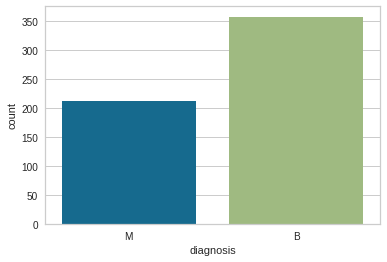

In [42]:
sns.countplot(df['diagnosis'])

In [43]:
df_temp = df.drop(['diagnosis'],axis=1)

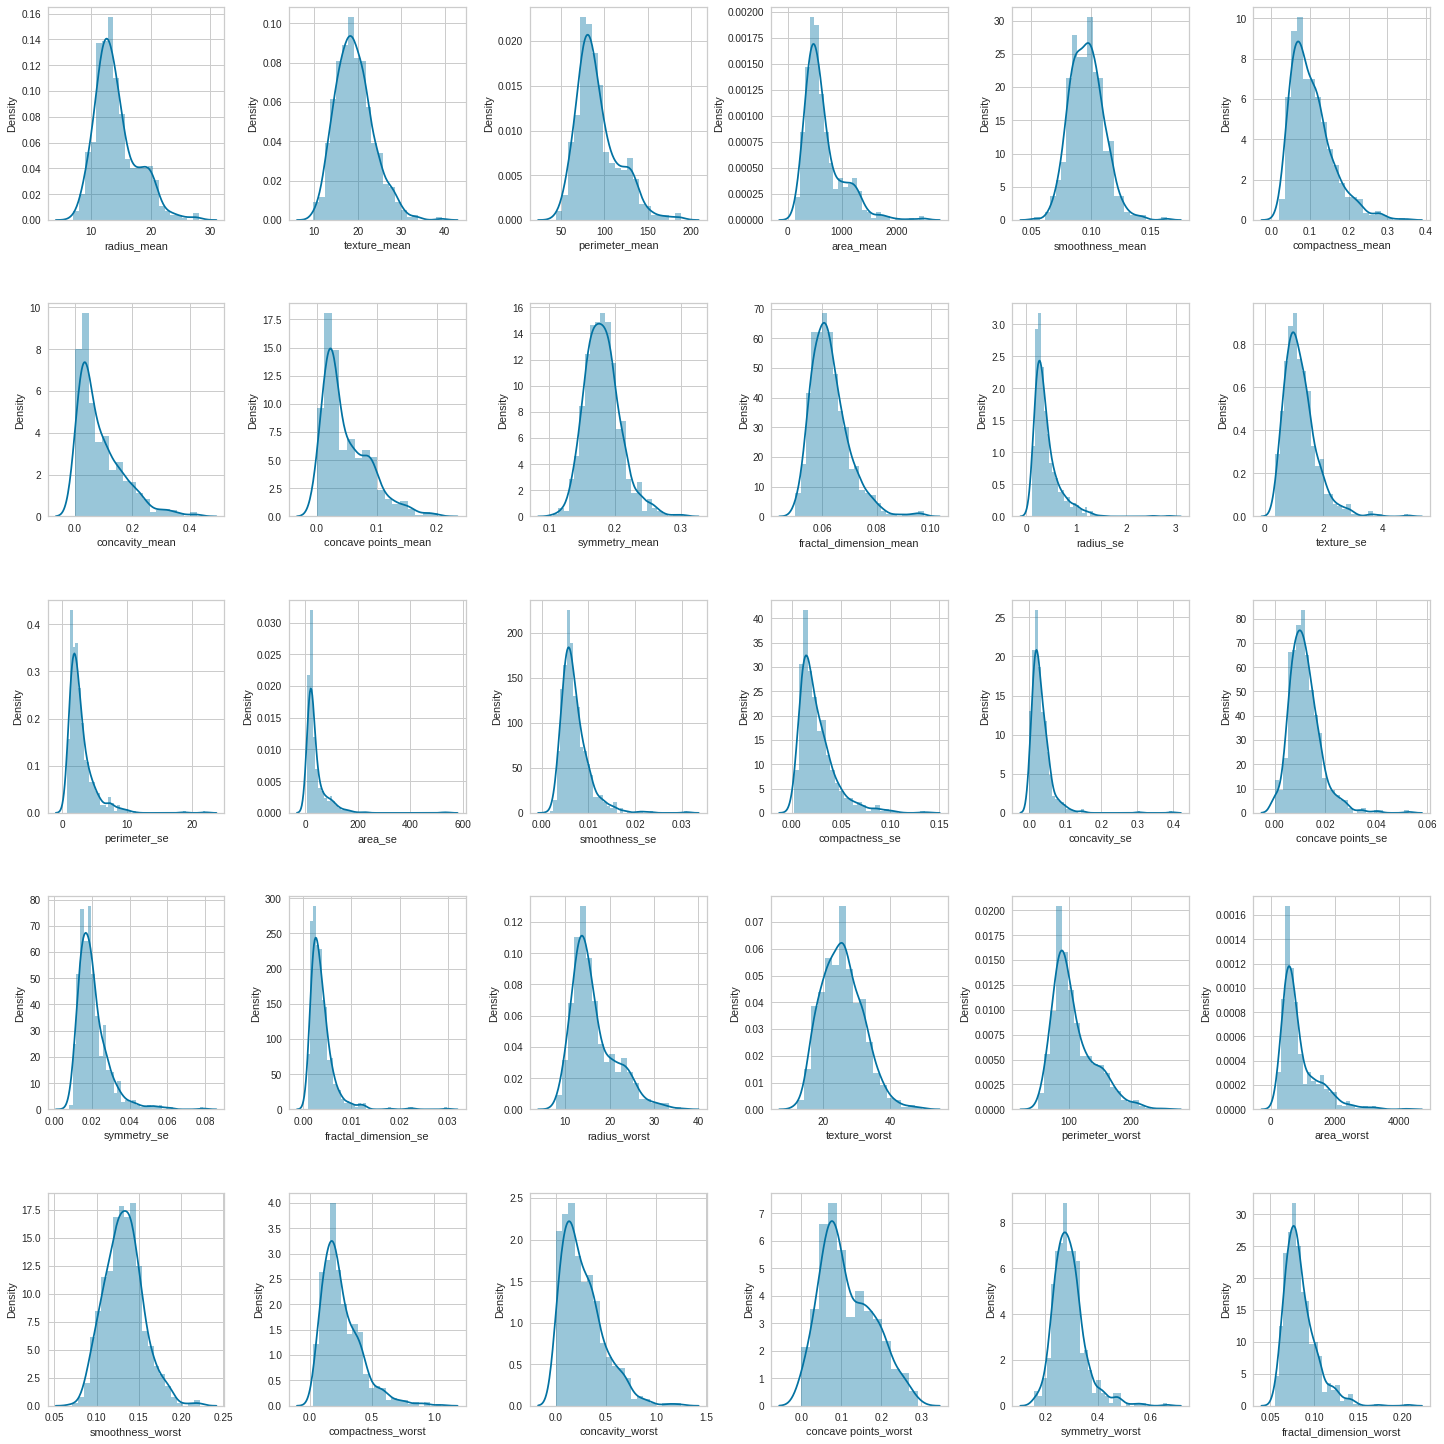

In [44]:
fig, ax = plt.subplots(ncols=6,nrows=5,figsize=(20,20))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
  sns.distplot(df[col],ax=ax[index])
  index += 1

plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

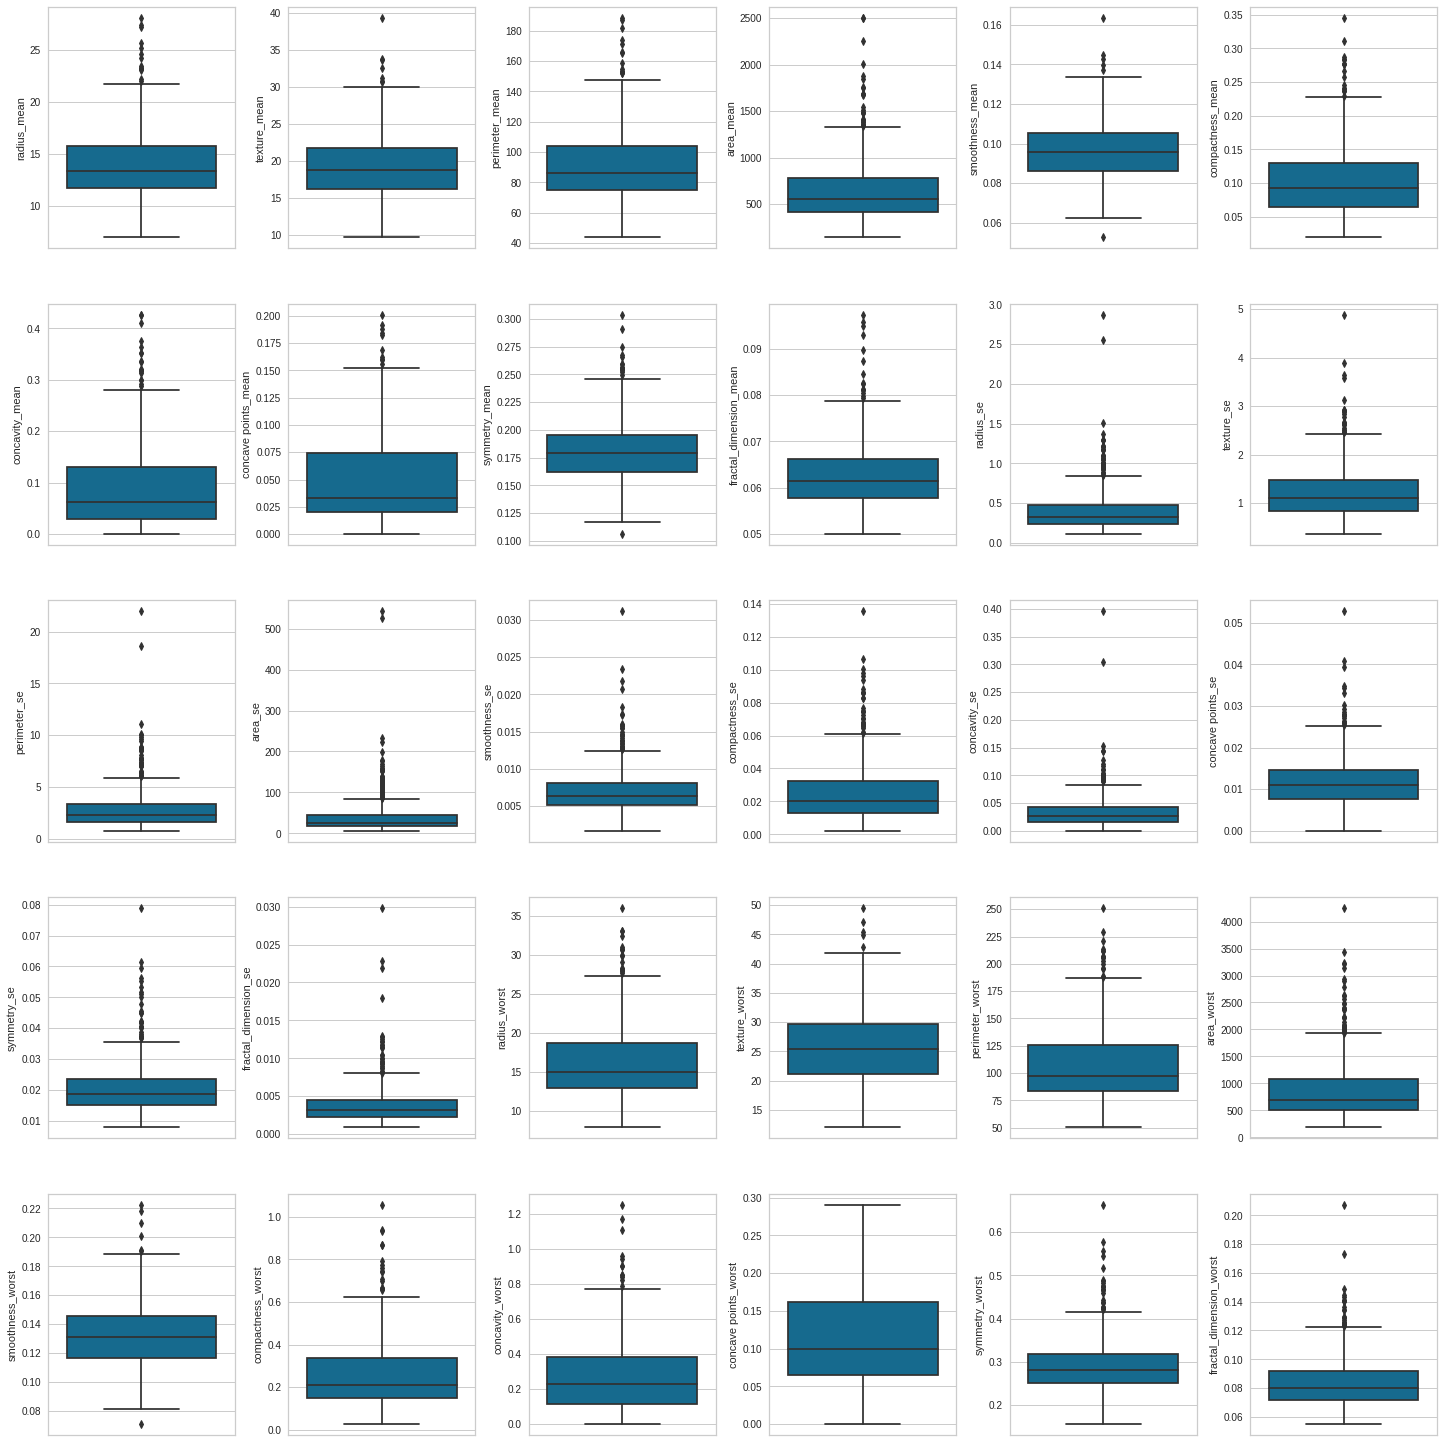

In [45]:
fig, ax = plt.subplots(ncols=6,nrows=5,figsize=(20,20))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
  sns.boxplot(y=col,data=df,ax=ax[index])
  index += 1

plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# **Pre-Processing the Data**



In [46]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
  Using cached scikit_learn-1.2.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.7 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires imbalanced-learn==0.7.0, but you have imbalanced-learn 0.10.1 which is incompatible.
pycaret 2.3.10 requires scikit-learn==0.23.2, but you have scikit-learn 1.2.0 whi

# Upsampling using SMOTETomek (Hybrid)

In [47]:
from imblearn.combine import SMOTETomek

In [48]:
from collections import Counter
counter = Counter(df['diagnosis'])

In [49]:
print('Before:',counter)

Before: Counter({'B': 357, 'M': 212})


In [50]:
smt = SMOTETomek(random_state=139)

In [51]:
X, y = smt.fit_resample(df.iloc[:,1:],df['diagnosis'])

In [52]:
counter = Counter(y)

In [53]:
print('After:',counter)

After: Counter({'M': 350, 'B': 350})


In [54]:
type(X)

pandas.core.frame.DataFrame

# **Outlier removal**

## here i am removing data points that are three standard deviations away from the mean

In [55]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(n_std*sd))]
    return df

In [56]:
clms = X.columns

In [57]:
clms

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [58]:
df=remove_outliers(X,clms,3)

Working on column: radius_mean
Working on column: texture_mean
Working on column: perimeter_mean
Working on column: area_mean
Working on column: smoothness_mean
Working on column: compactness_mean
Working on column: concavity_mean
Working on column: concave points_mean
Working on column: symmetry_mean
Working on column: fractal_dimension_mean
Working on column: radius_se
Working on column: texture_se
Working on column: perimeter_se
Working on column: area_se
Working on column: smoothness_se
Working on column: compactness_se
Working on column: concavity_se
Working on column: concave points_se
Working on column: symmetry_se
Working on column: fractal_dimension_se
Working on column: radius_worst
Working on column: texture_worst
Working on column: perimeter_worst
Working on column: area_worst
Working on column: smoothness_worst
Working on column: compactness_worst
Working on column: concavity_worst
Working on column: concave points_worst
Working on column: symmetry_worst
Working on column:

In [59]:
df.shape

(543, 30)

# Removing outliers is not a good option as 43% of the data is lost, so we will only carry out upsampling of the minority class

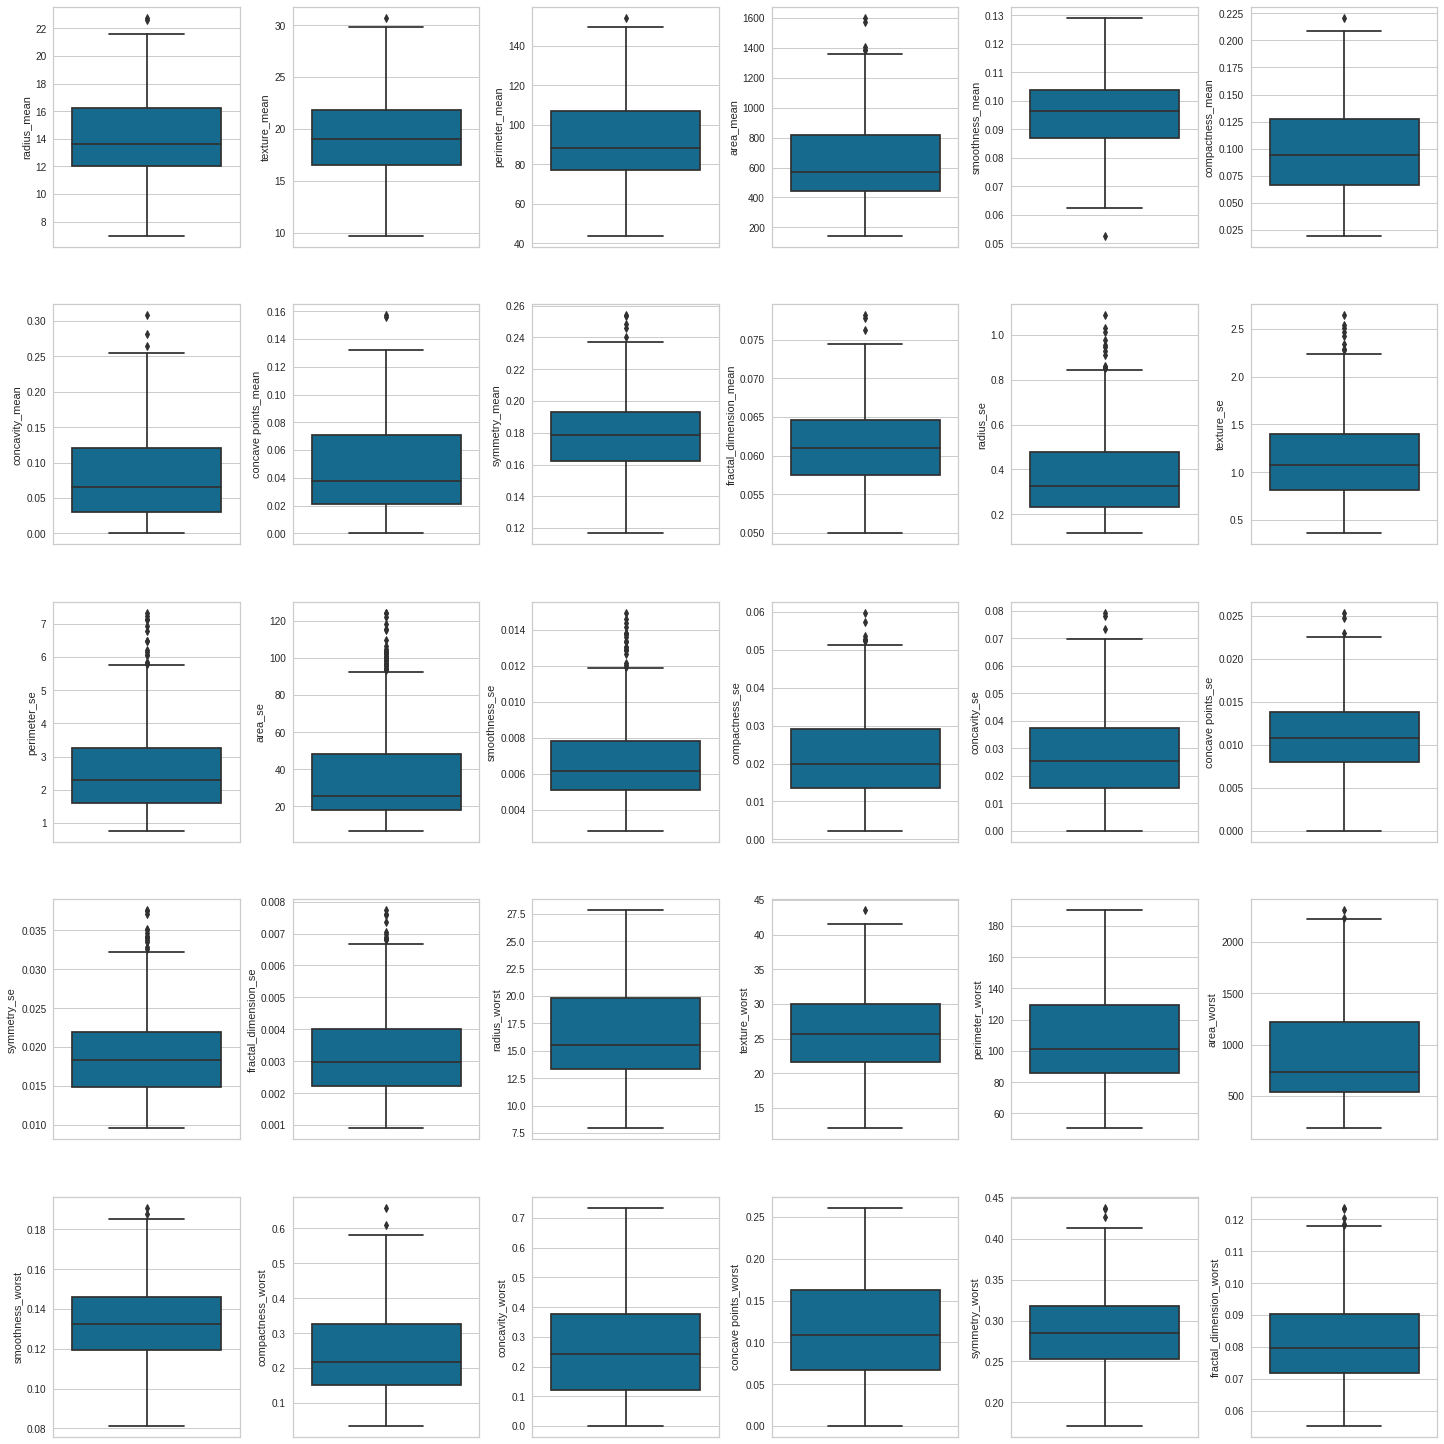

In [60]:
fig, ax = plt.subplots(ncols=6,nrows=5,figsize=(20,20))
index = 0
ax = ax.flatten()

for col in df.columns:
  sns.boxplot(y=col,data=df,ax=ax[index])
  index += 1

plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# **Upsampled Data**

In [61]:
X['diagnosis'] = y

In [62]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [63]:
X.shape

(700, 31)

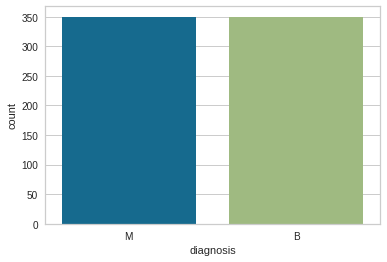

In [64]:
sns.countplot(X['diagnosis'])

# **Create and Train Model**

In [65]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
X['diagnosis']= label_encoder.fit_transform(X['diagnosis'])
  
X['diagnosis'].unique()

array([1, 0])

In [66]:
X.head() # M - 1, B - 0

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [67]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached scikit_learn-0.23.2-cp38-cp38-manylinux1_x86_64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [68]:
clf = setup(X,target='diagnosis')

,Description,Value
0,session_id,7671
1,Target,diagnosis
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(700, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='diagnosis',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [69]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9775,0.9970,0.9795,0.9763,0.9776,0.9550,0.9556,0.355
ada,Ada Boost Classifier,0.9755,0.9966,0.9752,0.9773,0.9756,0.9509,0.9521,0.244
gbc,Gradient Boosting Classifier,0.9754,0.9964,0.9795,0.9733,0.9759,0.9508,0.9519,0.597
ridge,Ridge Classifier,0.9714,0.0000,0.9590,0.9843,0.9709,0.9427,0.9441,0.013
lightgbm,Light Gradient Boosting Machine,0.9713,0.9968,0.9672,0.9764,0.9712,0.9426,0.9437,0.235
lda,Linear Discriminant Analysis,0.9673,0.9968,0.9472,0.9875,0.9665,0.9346,0.9361,0.024
lr,Logistic Regression,0.9632,0.9948,0.9588,0.9689,0.9625,0.9263,0.9285,0.329
rf,Random Forest Classifier,0.9632,0.9952,0.9712,0.9577,0.9635,0.9263,0.9281,0.246
qda,Quadratic Discriminant Analysis,0.9632,0.9915,0.9795,0.9507,0.9644,0.9264,0.9277,0.015
knn,K Neighbors Classifier,0.9510,0.9839,0.9388,0.9638,0.9502,0.9019,0.9038,0.026


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7671, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7671, verbose=0,
                     warm_start=False)

In [71]:
model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9592,0.9933,0.9600,0.9600,0.9600,0.9183,0.9183
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9796,0.9983,1.0000,0.9615,0.9804,0.9591,0.9599
3,0.9592,0.9967,0.9600,0.9600,0.9600,0.9183,0.9183
4,0.9796,1.0000,1.0000,0.9615,0.9804,0.9591,0.9599
5,0.9796,1.0000,0.9583,1.0000,0.9787,0.9591,0.9599
6,0.9796,0.9983,0.9583,1.0000,0.9787,0.9591,0.9599
7,0.9796,1.0000,1.0000,0.9600,0.9796,0.9592,0.9600
8,0.9796,1.0000,1.0000,0.9600,0.9796,0.9592,0.9600


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7671, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [72]:
# hyperparameter tuning
best_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9388,0.9950,0.9600,0.9231,0.9412,0.8774,0.8781
1,0.9796,1.0000,1.0000,0.9615,0.9804,0.9591,0.9599
2,0.9592,0.9950,1.0000,0.9259,0.9615,0.9182,0.9213
3,0.9592,0.9983,0.9600,0.9600,0.9600,0.9183,0.9183
4,0.9592,0.9967,1.0000,0.9259,0.9615,0.9182,0.9213
5,0.9796,1.0000,0.9583,1.0000,0.9787,0.9591,0.9599
6,0.9592,0.9983,0.9167,1.0000,0.9565,0.9182,0.9213
7,0.9796,1.0000,1.0000,0.9600,0.9796,0.9592,0.9600
8,0.9796,1.0000,1.0000,0.9600,0.9796,0.9592,0.9600


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=10, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.001, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=-1,
                     oob_score=False, random_state=7671, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [73]:
evaluate_model(best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=10, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.001, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=-1,
                     oob_score=False, random_state=7671, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

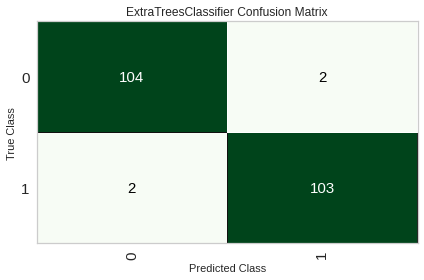

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [74]:
plot_model(estimator=best_model,plot='confusion_matrix')

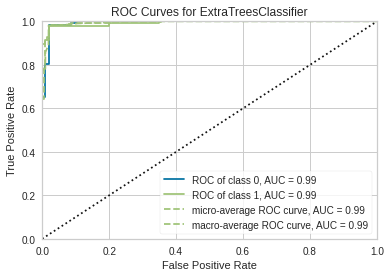

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [75]:
plot_model(best_model)

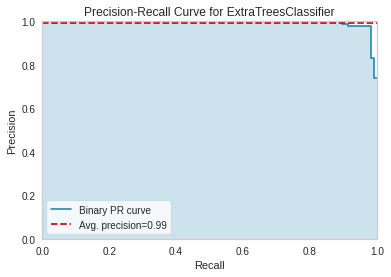

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [76]:
plot_model(best_model, plot = 'pr')

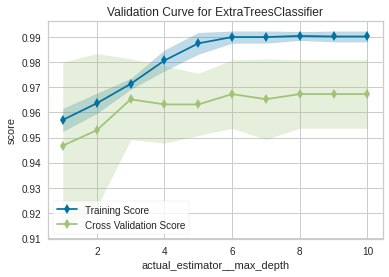

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [77]:
plot_model(best_model, plot = 'vc')

In [78]:
final_model = finalize_model(best_model)
save_model(best_model, 'saved_extra_trees_model') 

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=10, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.001, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=-1,
                     oob_score=False, random_state=7671, verbose=0,
                     warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=10, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decreas

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='diagnosis',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                  ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight='balanced',
                                       criterion='entropy', max_depth=10,
                                       max_features=1.0, max_leaf_

In [79]:
saved_model = load_model('saved_extra_trees_model') 

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=saved_extra_trees_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


# **Predictions**

In [90]:
print(X.iloc[0:5,-1])

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


In [89]:
data_unseen = X.iloc[0:5,:]
prediction = predict_model(saved_model, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='diagnosis',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                 ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                                      class_weight='balanced',
                                      criterion='entropy', max_depth=10,
         

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0,0,1.0,1.0,1.0,NaN,0.0
